# 1. Assignment 5 Summary

**1. Importing all the required libraries.**

**2. Reading the data into pandas.**

**3. Feature Engineering cleaning and organising the data for further processing :**
  
  
        A. Checked the data for null values.
   
   **Missing Values handling**
   
       B. Imputing missing data: in this case ive decided to impute the missing values instead of just dropping them.
        C. Encoded the months to numbers from 1 - 12.
        D. concatenated the month year and day into a single column. and droped the original columns 
        E. Converted the dates into python date time objects.
        F. Grouped the countries with less than 7000 entries into other country. and converted the country column to dummies. ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', "Other"]. 
        
  **Data Outliers**  
  
        G. Checked for outliers in the Data. :  displayed the boxplots for numeric variables to find out the outliers in
            the data. 
        H. Replaced the outliers in the data with upper, lower range of whickers of the box plot.
        I. Replaced the outliers in babies and childrens column.
        J. For feature extraction and dimesionality reduction, we can use techniques like, Regularization, PCA, Forward and 
        backward selection. in this case ive just dropped the columns baesd on corelation and general assumption based on the data. 
        
**4. Exploratory Data Analysis.**
        
        A. Explored the data by print the head.
        B. Checked the corelation with the target variables.
        C. Checked the proportion of the target class. how many of the bokkings are canceled .
        D.  Plotted the trend in total number of cancelation per month, over the whole timeline.
        E. plotted few bar plots for understanding the cancelation % distibution based on some categorical variables.
        
**5. One hot encoding and normalising the data :**
        
**One Hot Encoding & Normalization**

        A. Converted the categorical columns to numrical by getting the dummty columns. (Not all columns are used).
        B. The data is then Normalised using Standard Scaler.
        C. The data is then splitted into the training and testing sets. the same normilised sets are used in all models.
 
**The Results, accuracy scores, and the run times are displayed below the summary**


**6. Logistics Regression:**

        A. Logistics Regression is run with default parameters.
        
 **Probability Threshold determination**
      
        B. The model is run with different thersholds. (Chose Accuracy Score as a metric)
        
 **7. K - Nearest Neighbors:**
 
 
**Hyperparameter Tuning** = Number of K neighbors
       
       A. K - Nearest Neighbors is run with default parameters in a loop for different nearest neighbors to find the best number of neighbors.
        
 **Probability Threshold determination**
      
        B. The model is run with different thersholds with the selected 6 nearest neighbors.
        
        (Chose Accuracy Score as a metric)
        
 **8. Decision Tree**
 
 
**Hyperparameter Tuning** = Best parameters for the decision tree.
       
       A. Decison tree is run with a set of different parameters.
       
       B. The best paramerters are as follows:
       {'criterion': 'gini','max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'splitter': 'best'}
               
 **9. Random Forest Classifier**
 
 
**Hyperparameter Tuning** = Best parameters for the Random Forest.
       
       A. Random forest is run with a set of different parameters.
       
       B. The best paramerters are as follows:
       {'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1}
       
       
       
 **10. MLP Classifier**
 
 
**Hyperparameter Tuning** = Best parameters for the multilayer perceptron classifier.
       
       A. MLP is run with a set of different parameters.
       
       B. The best paramerters are as follows:
       {'hidden_layer_sizes': (50, 50, 50), 'max_iter': 1500, 'solver': 'sgd'}


# Model Selection

In [177]:
ResultDF

,Model Performance(Accuracy Score),Run Time,HyperParameter Tuning Run Time
Model,,,
Random Forest,0.880,10.7 s,7min 9s
Decision Trees,0.850,0.85 ms,21.9 s
MLP Clasifier,0.850,9min 7s,1h 40min 44s
KNN,0.842,2min 1s,9min 59s
Logistic Regression,0.812,1.38 s,-


When Run on same number of features :


**Random Forest CLassifier is the best model in terms of model accuracy.**


**Logistics Regression has low run Time.**

# Recommendations

1. MLP Clasifier Hyperparameter tuning Takes a long time to run, so feature selection is of prime inmportance.

2. We can use the tuned Random forest Classifier to accurately predict whether the booking will be canceled or not.


# 2. Classification Methods Summary

# Logistics Regression

### Steps
 

**1. The classifier is trained on the trainig data.**

**2. The algorithm calculates the conditional probability that a perticular sample belongs to a class.**

**3. The algorithm fits the sigmoid function to the data to predict the class based on pobability threshold.**

It is a supervised learning algorith. Logistic regression is a binary classification algorithm but can also be 
used for multiclass classification problem, using one vs rest methods.
The algorithm fits a S curve (sigmoid function to the data) and tells you the 
probabilities of the perticular outcome, and then it classifies the outcome as
one of the class based on the probability threshold. 


# K  Nearest Neighbors

### Steps

**1. The classifire is given a unclassified sample**

**2. The algorithm calculates the distnace from the new datapoints to all other known data points that are classified.**

**3.The algorithm then sorts the distnace and select the K distances.(K number specified initially)**


**4.The algorithm then sorts the distances and select the K distances.(K number specified initially)**

**5. Now the algorithm make a classification decision based on the majority class of the K selected neighbors.**


The K nearest neighbors is supervise leaning alorithm , is quite intuitive and easy to understand, 
the algorithm works by calculating the distance of all the data points from the new unseen data point to be classified,
the algorith uses euclidian distance, but can specify which distance measure (Eclidian, Manhattan, Minkowski) to use as a parameter.it then sorts all the distances in ascending order and and selects the K nearest neighbors which specified.
the algorithm then counts the number of each class label present in the k selected neighbors. It then assigns the new data point to the majority class. The algorithm gets slower when the data set is large., it is affected by the scale of the data
so the needs to be normalised before traning the KNN algorithm on it.

# Assignment 5


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import binarize
%matplotlib inline
plt.style.use('fivethirtyeight')

# 1. Data Cleaning

In [90]:
HotelsDF = pd.read_csv("hotel_bookings.csv")
HotelsDF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [91]:
HotelsDF.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Company and agent column has most missing data of any column, we can try to impute the missing data.

In [92]:
# Replacing null value for country feature with "unknown"
HotelsDF['country'].replace(to_replace=np.nan, value="Unknown", inplace=True)

In [93]:
# Changing agent value of "NULL" to "No Agent":
HotelsDF['agent'].replace(to_replace=np.nan, value='No Agent', inplace=True)

In [94]:
# Changing company value of "NULL" to "No Company":
HotelsDF['company'].replace(to_replace=np.nan, value='No Company', inplace=True)

In [95]:
HotelsDF = HotelsDF.dropna()

In [96]:
HotelsDF.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Convert dates to Datetime object.

In [97]:
HotelsDF['reservation_status_date'] = pd.to_datetime(HotelsDF['reservation_status_date'])

Encode the arrival month column to to numeric and then to date time 

In [98]:
HotelsDF["arrival_date_month"] = HotelsDF["arrival_date_month"].map({'July':7, 'August':8,
                                                                     'September':9, 'October':10,
                                                                     'November':11, 'December':12,
                                                                     'January':1, 'February':2,
                                                                     'March':3, 'April':4, 'May':5, 'June':6},
                                                                      na_action=None)

In [99]:
HotelsDF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [100]:
HotelsDF['arrival_date'] = pd.to_datetime(HotelsDF['arrival_date_year'].astype(str) 
                                            + '/' 
                                            + HotelsDF['arrival_date_month'].astype(str)
                                            + '/'
                                            + HotelsDF['arrival_date_day_of_month'].astype(str))


Now we can drop some 4  columns from our data, assuming the arrival week doesnt have a effect on the booking cancellation

In [101]:
HotelsDF = HotelsDF.drop(columns=["arrival_date_year",
                                  "arrival_date_month", 
                                  "arrival_date_day_of_month",
                                 "arrival_date_week_number"], axis=1)

# Impute countries with low number of records in country column using lambda function

In [102]:
CDF = HotelsDF["country"].value_counts()[:5].sort_values(ascending=False)
print(CDF)
Countrylist = list(CDF.index)
Countrylist

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64


['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

Portugal has highest number of cancellations than any other country. we will group the countries other top 5 listed above into other countries.

In [103]:
HotelsDF["country"] = HotelsDF["country"].apply(lambda x: x if x in Countrylist else "other")

In [104]:
HotelsDF["country"].value_counts()

PRT      48586
other    32401
GBR      12129
FRA      10415
ESP       8568
DEU       7287
Name: country, dtype: int64

## Removing Outliers

In [105]:
categoricalcol = [col for col in HotelsDF.columns if HotelsDF[col].dtype =="object"]
NumericCols = [col for col in HotelsDF.columns if col not in categoricalcol]
NumericCols

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'arrival_date']

as can be seen in the above list some numeric columns are already encoded but they are Discrete
we will select only continuous columns for removing outliers.

## Boxplot of all variables

In [106]:
NumericCols=['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

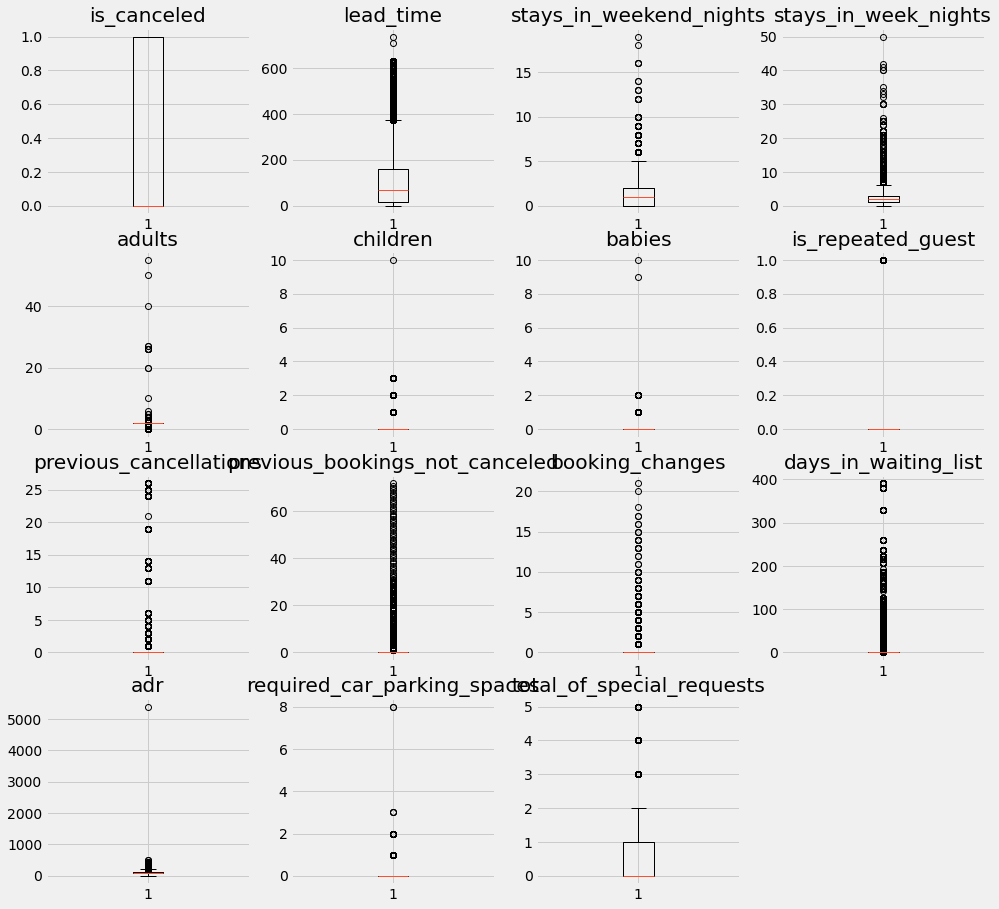

In [107]:
plt.figure(figsize=(15, 30))
for index, Variable in enumerate(NumericCols):
                     plt.subplot(8,4,index+1)
                     plt.boxplot(HotelsDF[Variable])
                     plt.title(Variable)
                     plt.grid(True)  

Lets find the outliers from the continuous variables:

In [108]:
HotelsDF['days_in_waiting_list'].value_counts()

0      115688
39        227
58        164
44        141
31        127
        ...  
36          1
193         1
37          1
165         1
74          1
Name: days_in_waiting_list, Length: 128, dtype: int64

**similarly i checked all the columns from NumericCols list for any patters, or if the variavble is continuous or not. and i found out that there are only a few columns which are continuos,
lets remove the outliers from them.**

In [109]:
NumCols=['lead_time','adr']

## Function to get the upper and lower range of the whiskers in the boxplot
**We will scale all the outlier to their upper and lower range**

## Removing Outliers

### Function to find out upper and lower limit of the whiskers of the boxplot

In [110]:
def GetOutliers(column):
    Q1, Q3 = column.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [111]:
for i in NumCols:
    lr, ur = GetOutliers(HotelsDF[i])
    HotelsDF[i] = np.where(HotelsDF[i] > ur, ur,HotelsDF[i])
    HotelsDF[i] = np.where(HotelsDF[i] < lr, lr,HotelsDF[i])

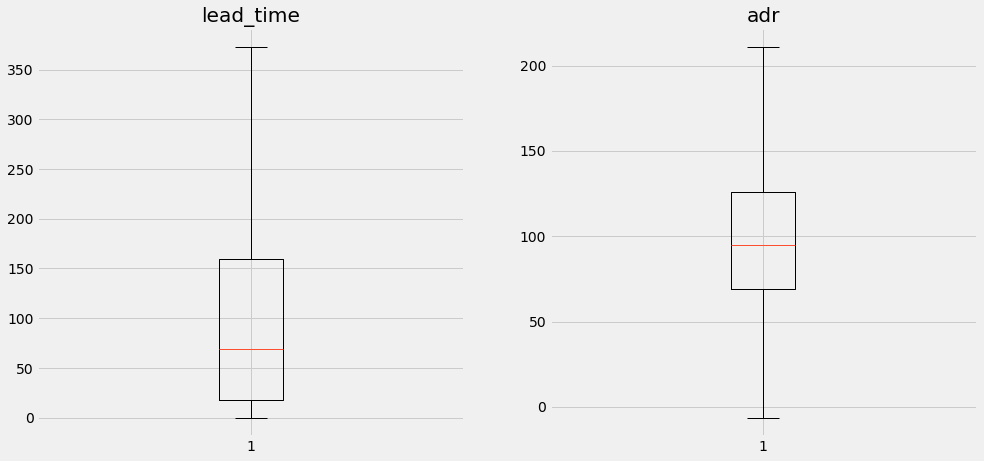

In [112]:
plt.figure(figsize=(15, 7))
for index, Variable in enumerate(NumCols):
                     plt.subplot(1,2,index+1)
                     plt.boxplot(HotelsDF[Variable])
                     plt.title(Variable)
                     plt.grid(True)
    
plt.show()

**The box plot looks clean after scaling all the outliers to upper and lower limits**


# Number of childrens

In [113]:
HotelsDF['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

**There appears to be a values where The number of children is 10 we will replace the value with 1. 
as it is more likely to be a mistake.**

In [114]:
HotelsDF['children'] = HotelsDF['children'].replace(10, 1)

In [115]:
HotelsDF["children"].value_counts()

0.0    110796
1.0      4862
2.0      3652
3.0        76
Name: children, dtype: int64

In [116]:
HotelsDF['babies'].value_counts()

0     118469
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [117]:
HotelsDF['babies'] = HotelsDF['babies'].replace(10, 1)
HotelsDF['babies'] = HotelsDF['babies'].replace(9, 1)

In [118]:
HotelsDF['babies'].value_counts()

0    118469
1       902
2        15
Name: babies, dtype: int64

# 1.Exploratory Data Analysis

lets take a look at the cleaned data

In [119]:
HotelsDF["meal"].value_counts()

BB           92306
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [120]:
HotelsDF.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342.0,0,0,2,0.0,0,BB,PRT,...,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,373.0,0,0,2,0.0,0,BB,PRT,...,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7.0,0,1,1,0.0,0,BB,GBR,...,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13.0,0,1,1,0.0,0,BB,GBR,...,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14.0,0,2,2,0.0,0,BB,GBR,...,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


categoriical Data : lets explore each column by plotting some graphs

In [121]:
HotelsDF[categoricalcol].head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,No Agent,No Company,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,No Agent,No Company,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,No Agent,No Company,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,304.0,No Company,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,240.0,No Company,Transient,Check-Out


In [122]:
HotelsDF.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119386.0,0.370395,0.482913,0.00,0.00,0.00,1.0,1.000
lead_time,119386.0,102.232481,101.158997,0.00,18.00,69.00,160.0,373.000
stays_in_weekend_nights,119386.0,0.927605,0.998618,0.00,0.00,1.00,2.0,19.000
stays_in_week_nights,119386.0,2.500310,1.908289,0.00,1.00,2.00,3.0,50.000
adults,119386.0,1.856390,0.579261,0.00,2.00,2.00,2.0,55.000
children,119386.0,0.103815,0.397539,0.00,0.00,0.00,0.0,3.000
babies,119386.0,0.007807,0.089426,0.00,0.00,0.00,0.0,2.000
is_repeated_guest,119386.0,0.031913,0.175770,0.00,0.00,0.00,0.0,1.000
previous_cancellations,119386.0,0.087121,0.844350,0.00,0.00,0.00,0.0,26.000
previous_bookings_not_canceled,119386.0,0.137102,1.497462,0.00,0.00,0.00,0.0,72.000


Corelation with the target variable

<AxesSubplot:>

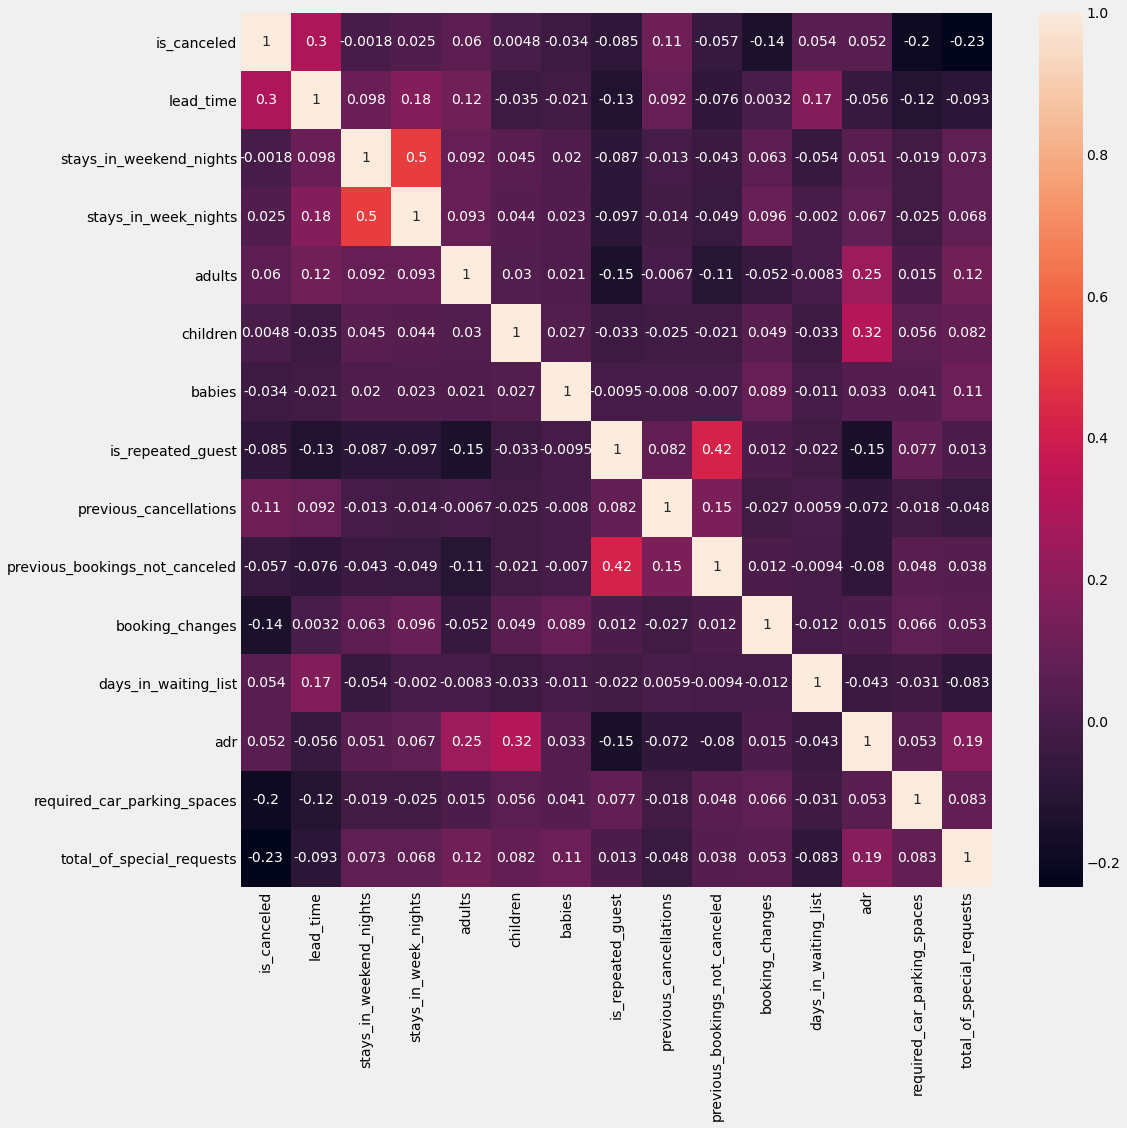

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(HotelsDF.corr(), annot=True)

1. Lead time and previous cancellation has higher positive corelation with the target variable.
2. total_of_special_requests, required_car_parking_spaces has higher negative corelation with the target variable.

Lets explore the relationships with target variables

### Proportion of bookings that are cancelled 

Text(0.5, 1.0, 'Percentage of Canceled Bookings')

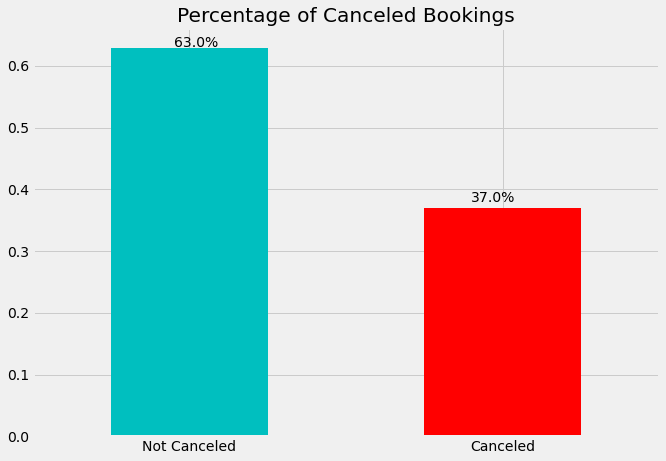

In [124]:
plt.figure(figsize=(10, 7))
ProporionIsCancelled = HotelsDF["is_canceled"].value_counts()/HotelsDF["is_canceled"].value_counts().sum()
ProporionIsCancelled.index = ['Not Canceled', 'Canceled']
ProporionIsCancelled.plot.bar(rot=0, color = ["c","r"])
plt.text(-0.05, 0.63, str(ProporionIsCancelled[0].round(3)*100)+"%")
plt.text(0.9, 0.38, str(ProporionIsCancelled[1].round(3)*100)+"%")
plt.title("Percentage of Canceled Bookings")

### Average Lead time per booking status

Text(0.5, 1.0, 'Percentage of Canceled Bookings')

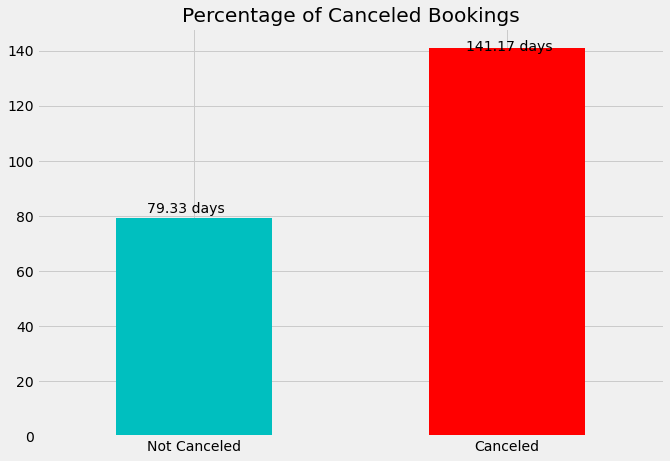

In [125]:
plt.figure(figsize=(10, 7))
AvgLeadTime = HotelsDF.groupby("is_canceled")["lead_time"].mean()
AvgLeadTime.index = ['Not Canceled', 'Canceled']
AvgLeadTime.plot.bar()
AvgLeadTime.plot.bar(rot=0, color = ["c","r"])
plt.text(-0.15, 81, str(AvgLeadTime[0].round(2))+" days")
plt.text(0.87, 140, str(AvgLeadTime[1].round(2))+" days")
plt.title("Percentage of Canceled Bookings")

    The cancelled bookings have higher lead time on average, potentially because the customers have more time foe cancelations, or some unforseen circumstance derails the plan.

 37% of bookings were canceled.

### Hotel Type and percentage of bookings

In [126]:
HotelsDF["hotel"].value_counts()

City Hotel      79326
Resort Hotel    40060
Name: hotel, dtype: int64

,Not Canceled,Canceled
City Hotel,58.28,41.72
Resort Hotel,72.24,27.76


<Figure size 1080x720 with 0 Axes>

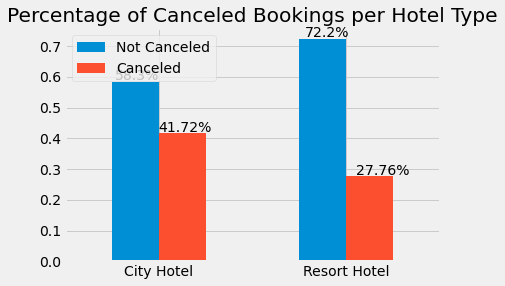

In [127]:

ProporionIsCancelledHotel = HotelsDF[HotelsDF["hotel"]
                                     =='City Hotel']["is_canceled"].value_counts()/(HotelsDF[HotelsDF["hotel"]
                                                                                             =='City Hotel']
                                                                                    ["is_canceled"].value_counts().sum())
ProporionIsCancelledResort = HotelsDF[HotelsDF["hotel"]
                                      =='Resort Hotel']["is_canceled"].value_counts()/(HotelsDF[HotelsDF["hotel"]
                                                                                                =='Resort Hotel']
                                                                                       ["is_canceled"].value_counts().sum())
DF = pd.concat([ProporionIsCancelledHotel, ProporionIsCancelledResort], axis=1)
DF.index = ['Not Canceled', 'Canceled']
DF.columns = ['City Hotel', 'Resort Hotel']
DF = DF.T
plt.figure(figsize=(15, 10))
DF.plot.bar(rot=0)
plt.text(-0.23, 0.59, str(ProporionIsCancelledHotel[0].round(3)*100)+"%")
plt.text(0, 0.42, str(ProporionIsCancelledHotel[1].round(4)*100)+"%")
plt.text(0.78, 0.73, str(ProporionIsCancelledResort[0].round(3)*100)+"%")
plt.text(1.05, 0.28, str(ProporionIsCancelledResort[1].round(4)*100)+"%")
plt.title("Percentage of Canceled Bookings per Hotel Type")
(DF*100).round(2)

The city hotels has higher percentage of cancellations than the resorts.

### Visualizing the number of canceled and not canceled bookings by date

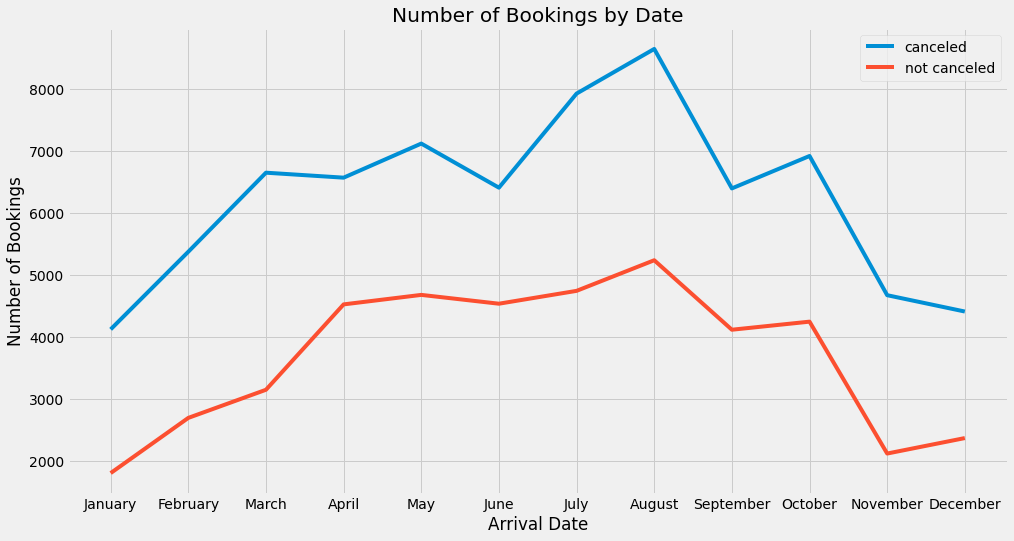

In [128]:
plt.figure(figsize=(15, 8))
HotelsDF = HotelsDF.set_index(pd.to_datetime(HotelsDF.arrival_date, format='%m/%d/%y %I:%M%p'))
Notcancelled = HotelsDF[HotelsDF["is_canceled"]==0]
cancelled = HotelsDF[HotelsDF["is_canceled"]==1]
Notcancelled.groupby(Notcancelled.index.month)["is_canceled"].count().plot()
cancelled.groupby(cancelled.index.month)["is_canceled"].count().plot()

### Create lists to set the ticks of graphs
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
month1 = [*range(1, 13, 1)]
plt.xticks(month1, months)
plt.ylabel('Number of Bookings')
plt.xlabel('Arrival Date')
plt.title('Number of Bookings by Date')
plt.legend(['canceled', 'not canceled'])

There's a simillar pattern in the number of booking cancelled vs non cacelled per month. the number bookings as well as the cancellations starts to decline after august i.e start of the winter season. people tend to go to resorts during the summer.

### Visualizing percentage of bookings canceled for each room type:

In [129]:
HotelsDF[HotelsDF["is_canceled"]==1].groupby(
    "reserved_room_type")["is_canceled"].count()

reserved_room_type
A    33630
B      364
C      308
D     6102
E     1914
F      880
G      763
H      245
L        2
P       12
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Percentage of Bookings Canceled')

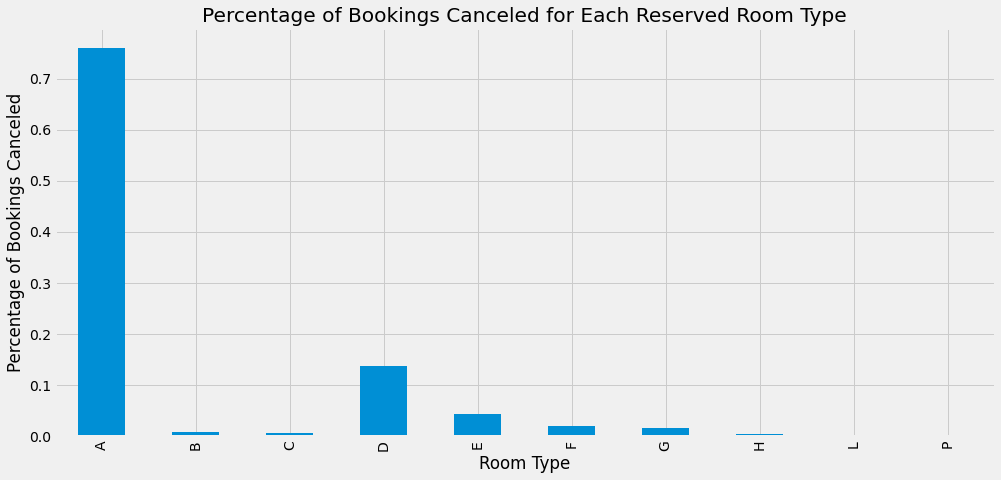

In [130]:
ProportionRoomTypeCanceled = HotelsDF[HotelsDF["is_canceled"]==1].groupby(
    "reserved_room_type")["is_canceled"].count()/HotelsDF[HotelsDF["is_canceled"]==1]["is_canceled"].count()
plt.figure(figsize=(15,7))
ProportionRoomTypeCanceled.plot.bar()
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type")
plt.xlabel("Room Type")
plt.ylabel("Percentage of Bookings Canceled")

the percentage of rooms canceled for the room type is highest.
but since we dont have any discription of the data..
we cant make any conlusion for predictions based on the room type 


### Country With highest cancellation Rates

<AxesSubplot:>

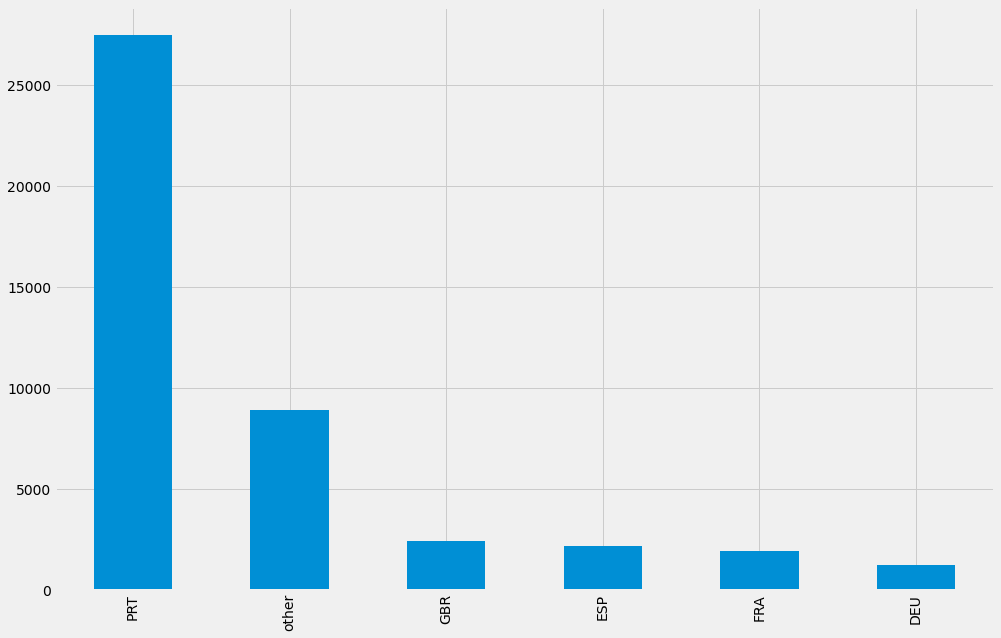

In [131]:
plt.figure(figsize=(15, 10))
Country = HotelsDF[HotelsDF["is_canceled"]==1]["country"].value_counts().sort_values(ascending=False)
Country[0:10].plot.bar()

portugal has highest number of cancelations. 

### cancelation for different customer types for different hotel type

[Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')]

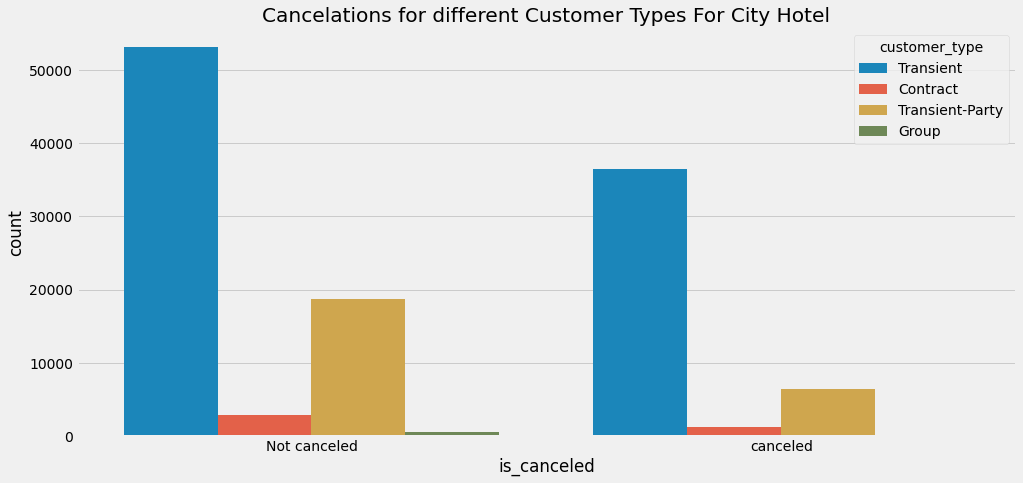

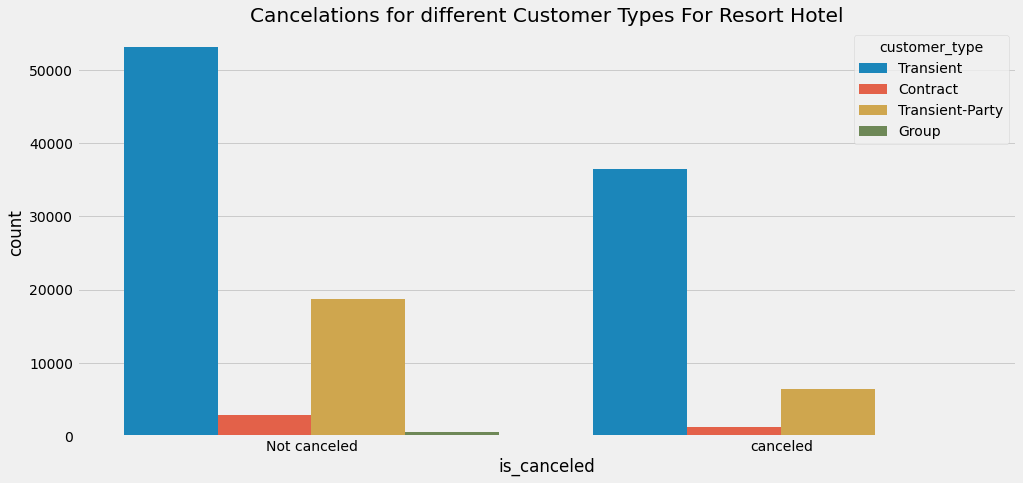

In [132]:
plt.figure(figsize=(15,7))
CityHotel=sns.countplot(data=HotelsDF, x='is_canceled', hue='customer_type')
plt.title('Cancelations for different Customer Types For City Hotel')
CityHotel.set_xticklabels(['Not canceled','canceled'])



plt.figure(figsize=(15,7))
ResortHotel=sns.countplot(data=HotelsDF, x='is_canceled', hue='customer_type')
plt.title('Cancelations for different Customer Types For Resort Hotel')
ResortHotel.set_xticklabels(['Not canceled','canceled'])

**lets check if the deposits affect the cancellation**
assumption: if a customer has paid some deposit he is less likely to cancel
compared to the person who didnt pay any deposit

In [133]:
HotelsDF['deposit_type'].value_counts()

No Deposit    104637
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [134]:
HotelsDF[HotelsDF["is_canceled"]==1]['is_canceled'].sum()

44220

In [135]:
HotelsDF.groupby(["is_canceled", 'deposit_type'])["is_canceled"].count()[1]

deposit_type
No Deposit    29690
Non Refund    14494
Refundable       36
Name: is_canceled, dtype: int64

deposit_type
No Deposit    67.142
Non Refund    32.777
Refundable     0.081
Name: is_canceled, dtype: float64

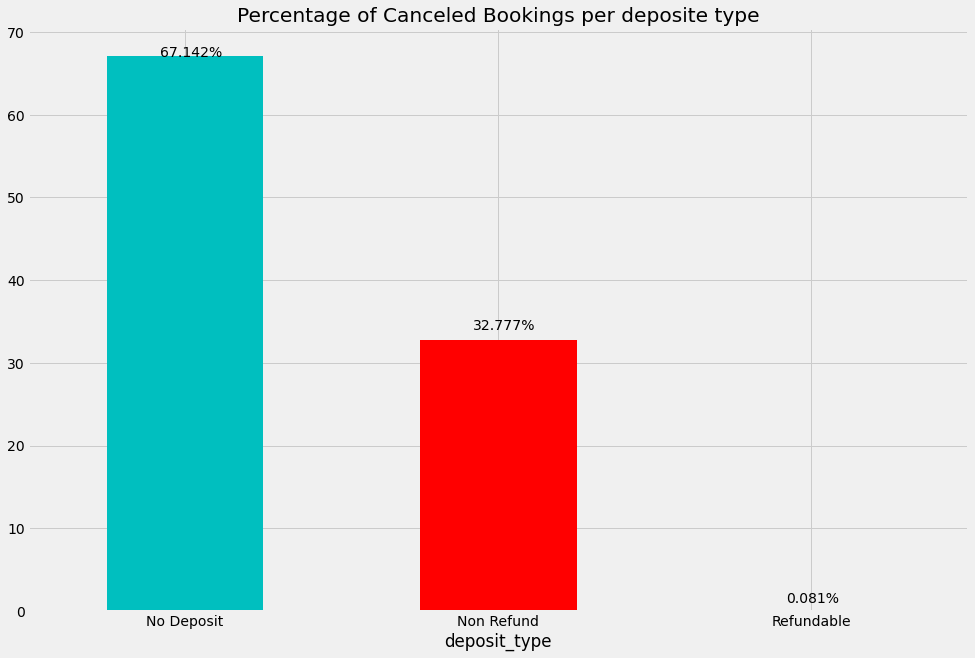

In [136]:
DepositTypeCancelled = (HotelsDF.groupby(["is_canceled", 'deposit_type'])["is_canceled"].count()[1]/(
    HotelsDF[HotelsDF["is_canceled"]==1]['is_canceled'].sum())*100).round(3)
plt.figure(figsize=(15, 10))       
DepositTypeCancelled.plot.bar(rot=0, color = ["c","r","b"])
plt.text(-0.08, 67, str(DepositTypeCancelled[0])+"%")
plt.text(0.92, 34, str(DepositTypeCancelled[1])+"%")
plt.text(1.92, 1, str(DepositTypeCancelled[2])+"%")
plt.title("Percentage of Canceled Bookings per deposite type")
DepositTypeCancelled

out of 44220 cancled bookings 67% had no deposits, since the customers doesnt have any monetory loss with the booking 
cancellation, they cancel the booking more often. the assumption is valid.

We have alredy dropped the following from the dataset and converted it to a one single column,


arrival_date_year                   
arrival_date_month                  
arrival_date_week_number            
arrival_date_day_of_month  

We will drop some more columns: from the data frame before we proceed with classification
we will drop the Reservation Status as it is telling us the status of the booking which we want to predict.
we will drop the country column, though the number of cancellations are high in portulgal.
but since theres no background available, we cant conclude anything based on the data. we will drop county column as well.
we drop the agent and company column as well.

# Normalising And Encoding the data

In [137]:
X=HotelsDF.drop(columns=["reservation_status", "reservation_status_date", 
                         "arrival_date", "is_canceled", "agent", "company" ], axis=1)
y=HotelsDF["is_canceled"]

In [138]:
CatCol = [col for col in X.columns if X[col].dtype == "object"]
NumCol = [col for col in X.columns if col not in CatCol]
NumCol, CatCol

(['lead_time',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests'],
 ['hotel',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type'])

### One Hot Encoding the Catergorical Variables

Using one hot encoder to convert the categorical data into numeic dummy columns.

In [139]:
OHE = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(OHE.fit_transform(X[CatCol]),columns=OHE.get_feature_names_out(),index=X.index)
X = pd.concat([X,Xcat],axis=1)
X.drop(columns=CatCol,axis=1,inplace=True)
Cols = X.columns

Scaling the data using sklerns standartd scaler.
it normalizes the data by substracting the mean and then dividing by the standars deviation.

In [140]:
SC = StandardScaler()
X = SC.fit_transform(X)

### Train test Split

Dividing the Dataset into trainig and testing sets in 70:30 proportion

In [141]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,y, test_size= 0.3 , random_state=1)

# Logistics Regression

In [142]:
LogReg = LogisticRegression()

In [143]:
LogReg.fit(X_TRAIN, Y_TRAIN)

LogisticRegression()

In [144]:
Y_PRED = LogReg.predict(X_TEST)
Y_PRED_PROB = LogReg.predict_proba(X_TEST)[:,1]

In [145]:
Y_TEST.value_counts()

0    22576
1    13240
Name: is_canceled, dtype: int64

<AxesSubplot:>

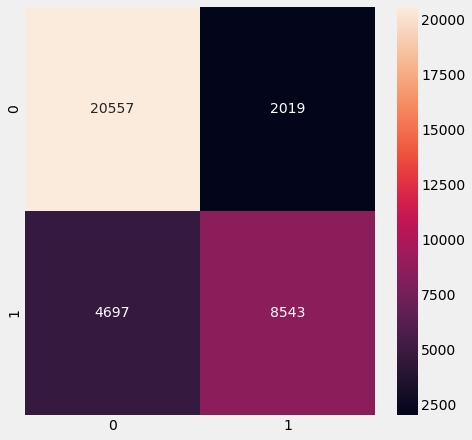

In [146]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(Y_TEST, Y_PRED).round(2), annot=True, fmt='g')

### Function to get Accuracy Mertics As DF for different Threshold

In [147]:
def get_accuracy_metrics(Y_TEST = Y_TEST,Y_PRED_PROB = Y_PRED_PROB):
    """
    calculates the acccuracy scores different propbabilty threshold 
    **returns**:
    a dataframe showing scores againts diffent 
    Threshold values
    Inputs:
        YTest,
        YPredProb (predicted probabilities)
        
    """
    Threshold = [*np.arange(0, 1.1, 0.1)]
    F1 = []
    accuracy=[]
    PrecisionList =[]
    RecallList =[]
    FPRList=[]
    FNRList =[]
    for i in Threshold:
        Y_PRED_CLASS = binarize([Y_PRED_PROB], threshold=i)[0]
        f1scr = f1_score(Y_TEST, Y_PRED_CLASS).round(3)
        F1.append(f1scr)
        m2 = accuracy_score(Y_TEST, Y_PRED_CLASS).round(3)
        accuracy.append(m2)
        tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
        Precision = precision_score(Y_TEST, Y_PRED_CLASS).round(3)
        #Precision = (tp/(tp+fp)).round(3)
        PrecisionList.append(Precision)
        Recall = recall_score(Y_TEST, Y_PRED_CLASS).round(3)
        RecallList.append(Recall)
        FPR = (fp/(fp+tn)).round(3)
        FPRList.append(FPR)
        FNR = (fn/(fn+tp)).round(3)
        FNRList.append(FNR)
    result = {"Threshold":Threshold, "Accuracy":accuracy, "F1":F1,
              "Precision":PrecisionList, 
              "Recall-TPR":RecallList,
                 "FPR":FPRList,
                   "FNR":FNRList}
    result = pd.DataFrame(result)
    return result

In [148]:
DFLR = get_accuracy_metrics(Y_TEST,Y_PRED_PROB)
DFLR

c:\users\waghm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Accuracy,F1,Precision,Recall-TPR,FPR,FNR
0,0.0,0.370,0.540,0.370,1.000,1.000,0.000
1,0.1,0.623,0.656,0.495,0.975,0.584,0.025
2,0.2,0.726,0.714,0.581,0.926,0.391,0.074
3,0.3,0.785,0.744,0.664,0.847,0.252,0.153
4,0.4,0.810,0.745,0.741,0.749,0.154,0.251
5,0.5,0.812,0.718,0.809,0.645,0.089,0.355
6,0.6,0.803,0.676,0.867,0.554,0.050,0.446
7,0.7,0.791,0.628,0.918,0.477,0.025,0.523
8,0.8,0.779,0.584,0.964,0.419,0.009,0.581
9,0.9,0.766,0.539,0.992,0.370,0.002,0.630


## Notes : Chossing the appropriate Threshold

Here we dont have any real life consequences, we just need to accurately classify whether or not a booking is cancelled we will use the accuraacy as a metric. and since threshold of 0.5 is giving us high accuracy score. we will use the default thereshold

AxesSubplot(0.08,0.07;0.696x0.81)
Accuracy_SCore: 0.812
Precision: 0.809
Recall: 0.645
FNR: 0.36
Wall time: 1.38 s


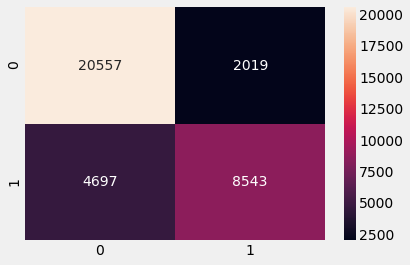

In [149]:
%%time
LogReg = LogisticRegression()
LogReg.fit(X_TRAIN, Y_TRAIN)
Y_PRED = LogReg.predict(X_TEST)
Y_PRED_PROB = LogReg.predict_proba(X_TEST)[:,1]
Y_PRED_CLASS = binarize([Y_PRED_PROB], threshold=0.5)[0]
tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
FNR = (fn/(fn+tp)).round(3)
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED_CLASS), annot=True, fmt='g'))
LGR_SCORE = accuracy_score(Y_TEST, Y_PRED_CLASS).round(3)
print("Accuracy_SCore:",accuracy_score(Y_TEST, Y_PRED_CLASS).round(3))
print("Precision:",precision_score(Y_TEST, Y_PRED_CLASS).round(3))
print("Recall:",recall_score(Y_TEST, Y_PRED_CLASS).round(3))
print("FNR:", FNR.round(2))

The logistics regression gives the accuracy score of 81.2%. with a run time of 1.38 s

# 3.KNN

Defined a function to get the different accuracy metrics as a function of different K neighbors.. to fint the optimal number of neighbors

### Function to get the accuracy metrics as a Dataframe for different K neighbors

In [150]:
def get_optimal_neighbors(XTRAIN, XTEST, YTRAIN, YTEST, N):
    """
    calculates the acccuracy scores for 1 to n neighbors 
    **returns**:
    a dataframe showing scores againts diffent 
    k values
    Inputs:
        Train test split data in sklearn order
        N = Max Number of neighbors
        
    """
    K = [*range(1,N+1)]
    F1 = []
    accuracy=[]
    PrecisionList =[]
    RecallList =[]
    FPRList=[]
    FNRList =[]
    for i in range(1,N+1):
        Model = KNeighborsClassifier(n_neighbors = i)
        Model.fit(XTRAIN, YTRAIN)
        Y_PRED = Model.predict(XTEST)
        f1scr = f1_score(YTEST, Y_PRED).round(3)
        F1.append(f1scr)
        m2 = accuracy_score(YTEST, Y_PRED).round(3)
        accuracy.append(m2)
        tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
        
        Precision = precision_score(YTEST, Y_PRED).round(3)
        #Precision = (tp/(tp+fp)).round(3)
        PrecisionList.append(Precision)
        Recall = recall_score(YTEST,Y_PRED).round(3)
        RecallList.append(Recall)
        FPR = (fp/(fp+tn)).round(3)
        FPRList.append(FPR)
        FNR = (fn/(fn+tp)).round(3)
        FNRList.append(FNR)
    result = {"K":K, "Accuracy":accuracy, "F1":F1,
              "Precision":PrecisionList, 
              "Recall-TPR":RecallList,
                 "FPR":FPRList,
                   "FNR":FNRList}
    result = pd.DataFrame(result)
    return result   

In [151]:
%%time
DFknn = get_optimal_neighbors(X_TRAIN, X_TEST, Y_TRAIN, Y_TEST,10)
DFknn

Wall time: 9min 37s


,K,Accuracy,F1,Precision,Recall-TPR,FPR,FNR
0,1,0.835,0.778,0.772,0.783,0.089,0.355
1,2,0.835,0.748,0.860,0.661,0.089,0.355
2,3,0.837,0.776,0.788,0.763,0.089,0.355
3,4,0.838,0.759,0.845,0.688,0.089,0.355
4,5,0.839,0.776,0.799,0.754,0.089,0.355
5,6,0.842,0.766,0.843,0.702,0.089,0.355
6,7,0.841,0.778,0.807,0.750,0.089,0.355
7,8,0.842,0.769,0.839,0.710,0.089,0.355
8,9,0.840,0.775,0.807,0.746,0.089,0.355
9,10,0.841,0.767,0.835,0.709,0.089,0.355


the run time for 10 iteration of k's took almost 10 mins.
K = 6 has highest accuracy score of 84%.
Lets Binarize using k  = 6, for different theresholds

accuracy_score: 0.842
AxesSubplot(0.08,0.07;0.696x0.81)
FNR: 0.3
Wall time: 2min 1s


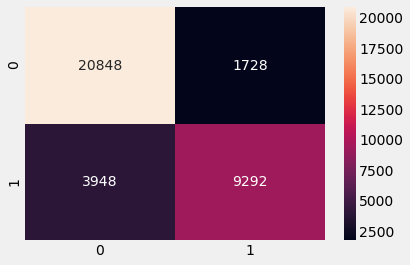

In [152]:
%%time
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_TRAIN, Y_TRAIN)
Y_PRED = KNN.predict(X_TEST)
Y_PRED_PROB = KNN.predict_proba(X_TEST)[:,1]
tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED).ravel()
FNR = (fn/(fn+tp)).round(3)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED).round(3))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED),annot=True, fmt='g'))
print("FNR:", FNR.round(2))

In [153]:
DFknn1 = get_accuracy_metrics(Y_TEST,Y_PRED_PROB)
DFknn1

c:\users\waghm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Accuracy,F1,Precision,Recall-TPR,FPR,FNR
0,0.0,0.715,0.713,0.568,0.957,0.427,0.043
1,0.1,0.715,0.713,0.568,0.957,0.427,0.043
2,0.2,0.795,0.762,0.668,0.889,0.259,0.111
3,0.3,0.795,0.762,0.668,0.889,0.259,0.111
4,0.4,0.834,0.780,0.763,0.799,0.146,0.201
5,0.5,0.842,0.766,0.843,0.702,0.077,0.298
6,0.6,0.842,0.766,0.843,0.702,0.077,0.298
7,0.7,0.828,0.719,0.911,0.593,0.034,0.407
8,0.8,0.828,0.719,0.911,0.593,0.034,0.407
9,0.9,0.805,0.649,0.968,0.488,0.009,0.512


accuracy_score: 0.842
AxesSubplot(0.08,0.07;0.696x0.81)


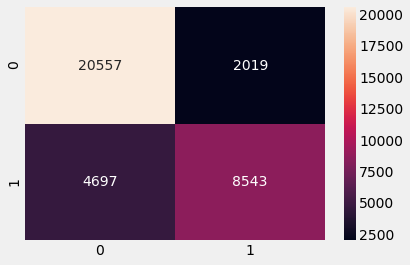

In [154]:
KNN_SCORE = accuracy_score(Y_TEST, Y_PRED).round(3)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED).round(3))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED_CLASS),annot=True, fmt='g'))

K nearest neighbors took 2min 1s to run for k = 6, and defualt probability threshold of 0.5.
we got the accuracy score of 84.2%

# 4. Decision Tree

Basic Decision Tree Model

In [155]:
DT=DecisionTreeClassifier()
DT.fit(X_TRAIN,Y_TRAIN)
Y_PRED=DT.predict(X_TEST)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED).round(2))
print(classification_report(Y_TEST, Y_PRED))
DT.get_params()

accuracy_score: 0.84
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     22576
           1       0.77      0.79      0.78     13240

    accuracy                           0.84     35816
   macro avg       0.83      0.83      0.83     35816
weighted avg       0.84      0.84      0.84     35816



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# HyperParameter Tuning

param_grid={"criterion":["gini", "entropy"],
    "splitter":["best","random"],
            "max_depth" : [10, 15,20,25,30],
           "min_samples_leaf":[1,2, 3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[50,60,70,80,90]}

After itrating through above dictionary and fining out the best parameter, I reduced the number of parameters in the dictonary after removing them one by one. to decrese the run time.

In [156]:
param_grid={"criterion":["gini"],
    "splitter":["best"],      
"max_depth" : [15,20, None],
           "min_samples_leaf":[1, 2,3],
            'max_features': ['auto', 'sqrt', None]}

In [157]:
%%time
GSCV=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=5, verbose =100)
GSCV.fit(X_TRAIN, Y_TRAIN)
GSCV.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Wall time: 22 s


{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 2,
 'splitter': 'best'}

The best features after tuning the decision tree are as shown above. 

In [158]:
GSCV.best_score_

0.843316979777432

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     22576
           1       0.81      0.77      0.79     13240

    accuracy                           0.85     35816
   macro avg       0.84      0.83      0.84     35816
weighted avg       0.85      0.85      0.85     35816

AxesSubplot(0.08,0.07;0.696x0.81)


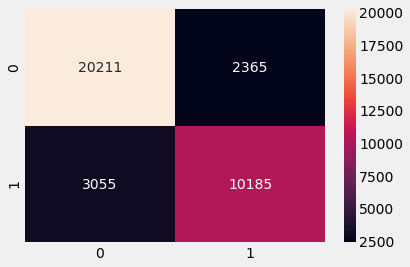

In [159]:
DT=DecisionTreeClassifier(criterion = 'gini',
 max_depth= 20,
 max_features= None,
 min_samples_leaf= 2,
 splitter= 'best')
DT.fit(X_TRAIN,Y_TRAIN)
Y_PRED=DT.predict(X_TEST)
Y_PRED_PROB = DT.predict_proba(X_TEST)[:,1]
print(classification_report(Y_TEST, Y_PRED))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED),annot=True, fmt='g'))

In [160]:
DFDT = get_accuracy_metrics(Y_TEST,Y_PRED_PROB)
DFDT

c:\users\waghm\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,Accuracy,F1,Precision,Recall-TPR,FPR,FNR
0,0.0,0.727,0.716,0.582,0.932,0.393,0.068
1,0.1,0.777,0.752,0.638,0.914,0.304,0.086
2,0.2,0.806,0.772,0.682,0.890,0.244,0.110
3,0.3,0.830,0.786,0.734,0.847,0.180,0.153
4,0.4,0.840,0.790,0.767,0.816,0.145,0.184
5,0.5,0.849,0.790,0.812,0.769,0.105,0.231
6,0.6,0.844,0.777,0.827,0.732,0.090,0.268
7,0.7,0.839,0.758,0.851,0.683,0.070,0.317
8,0.8,0.823,0.716,0.877,0.605,0.050,0.395
9,0.9,0.815,0.695,0.890,0.570,0.041,0.430


The default probability threshold works best for highest accuracy score

accuracy_score: 0.85
AxesSubplot(0.08,0.07;0.696x0.81)
FNR: 0.23
Wall time: 875 ms


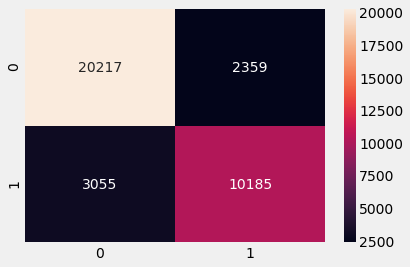

In [161]:
%%time
DT=DecisionTreeClassifier(criterion = 'gini',
 max_depth= 20,
 max_features= None,
 min_samples_leaf= 2,
 splitter= 'best')
DT.fit(X_TRAIN,Y_TRAIN)
Y_PRED=DT.predict(X_TEST)
Y_PRED_PROB = DT.predict_proba(X_TEST)[:,1]
Y_PRED_CLASS = binarize([Y_PRED_PROB], threshold=0.5)[0]
tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
FNR = (fn/(fn+tp)).round(3)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED_CLASS).round(2))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED_CLASS),annot=True, fmt='g'))
print("FNR:", FNR.round(2))
DT_SCORE=accuracy_score(Y_TEST, Y_PRED_CLASS).round(2)

The decision tree classifier took, 0.8 s to run and got a accuracy score of 85%

# 5. Random Forest


In [162]:
%%time
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_TRAIN,Y_TRAIN)
Y_PRED=RF.predict(X_TEST)
print(classification_report(Y_TEST, Y_PRED))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22576
           1       0.86      0.79      0.82     13240

    accuracy                           0.87     35816
   macro avg       0.87      0.86      0.86     35816
weighted avg       0.87      0.87      0.87     35816

Wall time: 10.3 s


In [163]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Tuning the random forest classifier

In [164]:
param_grid={"criterion":["gini"],
            "max_depth" : [20, 30, None],
           "min_samples_leaf":[1, 2],
            'max_features': ['auto', 'sqrt']}

In [165]:
%%time
RF = RandomForestClassifier()
# Perform Grid Search
GSCVRF = GridSearchCV(RF,param_grid,
                 cv = 5,
                 scoring = 'accuracy')
GSCVRF.fit(X_TRAIN,Y_TRAIN)
print(GSCVRF.best_params_)


{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1}
Wall time: 7min 9s


The best features after tuning the random forest are as shown above.

In [166]:
GSCVRF.score(X_TEST, Y_TEST).round(2)

0.88

In [167]:
%%time
RF=RandomForestClassifier(n_estimators=100,
                          criterion= 'gini', max_depth=30, max_features = "sqrt", min_samples_leaf= 1)
RF.fit(X_TRAIN,Y_TRAIN)
Y_PRED=RF.predict(X_TEST)
print(accuracy_score(Y_TEST, Y_PRED).round(2))
RF_SCORE = accuracy_score(Y_TEST, Y_PRED).round(2)

0.88
Wall time: 10.7 s


In [168]:
RF.feature_importances_
print(pd.Series(RF.feature_importances_, index=Cols).sort_values(ascending = False).round(4)[:15])

lead_time                       0.1562
adr                             0.1136
deposit_type_No Deposit         0.1062
deposit_type_Non Refund         0.0775
country_PRT                     0.0614
total_of_special_requests       0.0602
stays_in_week_nights            0.0493
previous_cancellations          0.0318
stays_in_weekend_nights         0.0300
market_segment_Online TA        0.0280
required_car_parking_spaces     0.0245
booking_changes                 0.0217
adults                          0.0166
customer_type_Transient         0.0160
market_segment_Offline TA/TO    0.0142
dtype: float64


In [ ]:
The RandomForestClassifier took, 10.7 s to run and got a accuracy score of 88%

# Nural Network MLPClassifier 

In [169]:
from sklearn.neural_network import MLPClassifier

In [170]:
MLP= MLPClassifier(hidden_layer_sizes=(100,100,100),activation="relu", max_iter=500, verbose=10)

Iteration 1, loss = 0.37288072
Iteration 2, loss = 0.33030019
Iteration 3, loss = 0.32038963
Iteration 4, loss = 0.31273346
Iteration 5, loss = 0.30798709
Iteration 6, loss = 0.30381836
Iteration 7, loss = 0.29982194
Iteration 8, loss = 0.29598191
Iteration 9, loss = 0.29292572
Iteration 10, loss = 0.28925776
Iteration 11, loss = 0.28658378
Iteration 12, loss = 0.28439447
Iteration 13, loss = 0.27991598
Iteration 14, loss = 0.27701892
Iteration 15, loss = 0.27437162
Iteration 16, loss = 0.27286419
Iteration 17, loss = 0.27068517
Iteration 18, loss = 0.26752776
Iteration 19, loss = 0.26460018
Iteration 20, loss = 0.26314497
Iteration 21, loss = 0.26063928
Iteration 22, loss = 0.25973270
Iteration 23, loss = 0.25554841
Iteration 24, loss = 0.25327257
Iteration 25, loss = 0.25159382
Iteration 26, loss = 0.24851021
Iteration 27, loss = 0.24666585
Iteration 28, loss = 0.24435057
Iteration 29, loss = 0.24305473
Iteration 30, loss = 0.24051491
Iteration 31, loss = 0.23804309
Iteration 32, los

Iteration 253, loss = 0.11527645
Iteration 254, loss = 0.11657156
Iteration 255, loss = 0.11816280
Iteration 256, loss = 0.11809905
Iteration 257, loss = 0.11845185
Iteration 258, loss = 0.11580098
Iteration 259, loss = 0.11393619
Iteration 260, loss = 0.11596065
Iteration 261, loss = 0.11482188
Iteration 262, loss = 0.11504894
Iteration 263, loss = 0.11481476
Iteration 264, loss = 0.11915634
Iteration 265, loss = 0.11627553
Iteration 266, loss = 0.11300119
Iteration 267, loss = 0.11437233
Iteration 268, loss = 0.11528347
Iteration 269, loss = 0.11528352
Iteration 270, loss = 0.11484305
Iteration 271, loss = 0.11293108
Iteration 272, loss = 0.11657054
Iteration 273, loss = 0.11436405
Iteration 274, loss = 0.11239537
Iteration 275, loss = 0.11365138
Iteration 276, loss = 0.11479911
Iteration 277, loss = 0.11274497
Iteration 278, loss = 0.11509806
Iteration 279, loss = 0.11275731
Iteration 280, loss = 0.11279246
Iteration 281, loss = 0.11181045
Iteration 282, loss = 0.11081985
Iteration 

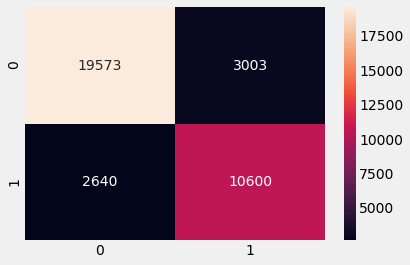

In [171]:
MLP.fit(X_TRAIN, Y_TRAIN)
Y_PRED=MLP.predict(X_TEST)
Y_PRED_PROB = MLP.predict_proba(X_TEST)[:,1]
Y_PRED_CLASS = binarize([Y_PRED_PROB], threshold=0.5)[0]
tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
FNR = (fn/(fn+tp)).round(3)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED_CLASS).round(2))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED_CLASS),annot=True, fmt='g'))

# Tuning the MLP classifier

In [172]:
%%time
parameters = {'solver': ["lbfgs", "sgd"], 'max_iter': [1500],  'hidden_layer_sizes':[(50,50,50), 
                                                                                     (60,60,60), (100,100,100)]}
GSCVMLP = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, scoring = 'accuracy', verbose=10)
GSCVMLP.fit(X_TRAIN,Y_TRAIN)
print(GSCVMLP.best_params_)
GSCVMLP.score(X_TEST, Y_TEST).round(2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'hidden_layer_sizes': (50, 50, 50), 'max_iter': 1500, 'solver': 'sgd'}
Wall time: 1h 40min 44s


0.85

The best parameters for the MLP classifiers are as shown above

Iteration 1, loss = 0.55990542
Iteration 2, loss = 0.43760243
Iteration 3, loss = 0.39975563
Iteration 4, loss = 0.38303672
Iteration 5, loss = 0.37350805
Iteration 6, loss = 0.36696074
Iteration 7, loss = 0.36218680
Iteration 8, loss = 0.35847778
Iteration 9, loss = 0.35549772
Iteration 10, loss = 0.35288462
Iteration 11, loss = 0.35065707
Iteration 12, loss = 0.34870662
Iteration 13, loss = 0.34712384
Iteration 14, loss = 0.34543790
Iteration 15, loss = 0.34402449
Iteration 16, loss = 0.34267705
Iteration 17, loss = 0.34137342
Iteration 18, loss = 0.34020713
Iteration 19, loss = 0.33903236
Iteration 20, loss = 0.33799750
Iteration 21, loss = 0.33693470
Iteration 22, loss = 0.33583877
Iteration 23, loss = 0.33479803
Iteration 24, loss = 0.33387858
Iteration 25, loss = 0.33304025
Iteration 26, loss = 0.33226644
Iteration 27, loss = 0.33135721
Iteration 28, loss = 0.33054423
Iteration 29, loss = 0.32984298
Iteration 30, loss = 0.32905215
Iteration 31, loss = 0.32855956
Iteration 32, los

Iteration 253, loss = 0.28275795
Iteration 254, loss = 0.28271448
Iteration 255, loss = 0.28248509
Iteration 256, loss = 0.28234049
Iteration 257, loss = 0.28229759
Iteration 258, loss = 0.28205147
Iteration 259, loss = 0.28257963
Iteration 260, loss = 0.28189828
Iteration 261, loss = 0.28180776
Iteration 262, loss = 0.28198572
Iteration 263, loss = 0.28184355
Iteration 264, loss = 0.28160647
Iteration 265, loss = 0.28158481
Iteration 266, loss = 0.28150683
Iteration 267, loss = 0.28128849
Iteration 268, loss = 0.28123962
Iteration 269, loss = 0.28126463
Iteration 270, loss = 0.28148719
Iteration 271, loss = 0.28116021
Iteration 272, loss = 0.28102340
Iteration 273, loss = 0.28091127
Iteration 274, loss = 0.28098038
Iteration 275, loss = 0.28105040
Iteration 276, loss = 0.28087904
Iteration 277, loss = 0.28079692
Iteration 278, loss = 0.28030224
Iteration 279, loss = 0.28059455
Iteration 280, loss = 0.28018436
Iteration 281, loss = 0.28022970
Iteration 282, loss = 0.27977391
Iteration 

Iteration 502, loss = 0.26460087
Iteration 503, loss = 0.26498998
Iteration 504, loss = 0.26482746
Iteration 505, loss = 0.26484279
Iteration 506, loss = 0.26481596
Iteration 507, loss = 0.26430120
Iteration 508, loss = 0.26454013
Iteration 509, loss = 0.26432971
Iteration 510, loss = 0.26428599
Iteration 511, loss = 0.26461629
Iteration 512, loss = 0.26425534
Iteration 513, loss = 0.26413878
Iteration 514, loss = 0.26408737
Iteration 515, loss = 0.26465496
Iteration 516, loss = 0.26401444
Iteration 517, loss = 0.26391269
Iteration 518, loss = 0.26387246
Iteration 519, loss = 0.26404002
Iteration 520, loss = 0.26422812
Iteration 521, loss = 0.26423074
Iteration 522, loss = 0.26438680
Iteration 523, loss = 0.26373381
Iteration 524, loss = 0.26435108
Iteration 525, loss = 0.26414954
Iteration 526, loss = 0.26386456
Iteration 527, loss = 0.26414252
Iteration 528, loss = 0.26349559
Iteration 529, loss = 0.26375162
Iteration 530, loss = 0.26384328
Iteration 531, loss = 0.26372269
Iteration 

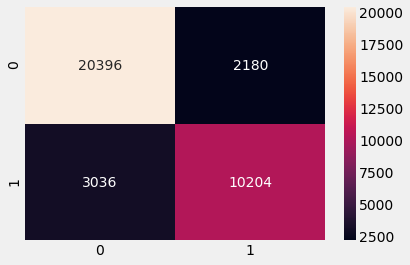

In [173]:
%%time
MLP= MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", max_iter=1500, solver='sgd', verbose=10)
MLP.fit(X_TRAIN, Y_TRAIN)
Y_PRED=MLP.predict(X_TEST)
Y_PRED_PROB = MLP.predict_proba(X_TEST)[:,1]
Y_PRED_CLASS = binarize([Y_PRED_PROB], threshold=0.5)[0]
tn, fp, fn, tp = confusion_matrix(Y_TEST, Y_PRED_CLASS).ravel()
FNR = (fn/(fn+tp)).round(3)
print("accuracy_score:", accuracy_score(Y_TEST, Y_PRED_CLASS).round(2))
print(sns.heatmap(confusion_matrix(Y_TEST, Y_PRED_CLASS),annot=True, fmt='g'))

In [174]:
MLP_SCORE = MLP.score(X_TEST, Y_TEST).round(2)

Tuning the Mlp classifier took close to 2 hours. After getting the best parameter the Nural network took 8 mins ti run, and got the accuracy score of 85%

# Summary

# Model Selection

In [176]:
ResultDict={"Model":["Logistic Regression", "KNN",
                     "Decision Trees", "Random Forest", "MLP Clasifier"], 
           "Model Performance(Accuracy Score)":[LGR_SCORE, KNN_SCORE,DT_SCORE,
                                                RF_SCORE, MLP_SCORE] ,
            "Run Time":["1.38 s", "2min 1s", "0.85 ms", "10.7 s", "9min 7s"],
            
            "HyperParameter Tuning Run Time":["-", "9min 59s", "21.9 s", "7min 9s", "1h 40min 44s"]
           }

ResultDF = pd.DataFrame(ResultDict)
ResultDF= ResultDF.set_index("Model").sort_values(by ="Model Performance(Accuracy Score)", ascending =False)
ResultDF

,Model Performance(Accuracy Score),Run Time,HyperParameter Tuning Run Time
Model,,,
Random Forest,0.880,10.7 s,7min 9s
Decision Trees,0.850,0.85 ms,21.9 s
MLP Clasifier,0.850,9min 7s,1h 40min 44s
KNN,0.842,2min 1s,9min 59s
Logistic Regression,0.812,1.38 s,-


When Run on same number of features :


**Random Forest CLassifier is the best model in terms of model accuracy.**


**Logistics Regression has low run Time.**

# Recommendations

1. MLP Clasifier Hyperparameter tuning Takes a long time to run, so feature selection is of prime inmportance.

2. We can use the tuned Random forest Classifier to accurately predict whether the booking will be canceled or not.
